#                             MODEL- LOGISTIC REGRESSION

In [20]:
"""Importing required libraries"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [21]:
# Loading the cleaned data
cleaned_data = pd.read_csv("Cleaned_data.csv")

# Previewing the dataset
cleaned_data.head()


,sideb,sideb_full,country_primary,sidea,sideb_id,NSAdyad_id,frontline_prev_best,frontline_prev_low,frontline_prev_high,frontline,...,wwing,wwing_frontline,wwing_noncombat,noncombat_clandestine,noncombat_outreach,noncombat_logistics,lead_military,lead_noncombat,coalition,low_information
0,ABSDF,All-Burma Students Democratic Front,Myanmar (Burma),Government of Myanmar (Burma),185.0,322.0,2.0,1.0,3.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0
1,ABSU,All Bodo Students Union,India,Government of India,362.0,309.0,1.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0
2,ADF,Alliance of Democratic Forces,Uganda,Government of Uganda,489.0,153.0,2.0,2.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0
3,AFDL,Alliance of Democratic Forces for the Liberati...,DR Congo (Zaire),Government of DR Congo (Zaire),422.0,39.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
4,AFRC,Armed Forces Revolutionary Council,Sierra Leone,Government of Sierra Leone,533.0,131.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0


In [22]:
# Grouping by country and computing aggregate metrics
country_stats = cleaned_data.groupby('country_primary').agg({
    'participation': 'sum',  
    'frontline_prev_best': 'mean',  
    'noncombat_prev_best': 'mean',  
    'lead_prev_best': 'mean',  
    'founders': 'sum',  
    'lead_military': 'sum'  
}).reset_index()

# Ranking countries by total participation
country_stats = country_stats.sort_values(by='participation', ascending=False)

# Previewing the aggregated data
country_stats.head(10)


,country_primary,participation,frontline_prev_best,noncombat_prev_best,lead_prev_best,founders,lead_military
27,India,24,1.269231,1.538462,0.769231,0.0,12.519126
43,Myanmar (Burma),15,0.535714,1.107143,0.500000,1.0,1.000000
0,Afghanistan,11,0.076923,0.384615,0.153846,0.0,0.000000
76,Uganda,8,0.466667,0.800000,0.533333,1.0,6.000000
50,"Palestine, Israel",8,1.444444,3.000000,1.555556,0.0,2.000000
22,Ethiopia,8,1.250000,1.812500,1.000000,0.0,5.000000
17,DR Congo (Zaire),7,0.000000,0.272727,0.000000,0.0,0.000000
67,Sudan,6,0.153846,1.000000,0.538462,0.0,1.000000
30,Iraq,5,1.000000,1.500000,0.875000,0.0,0.000000
11,Chad,5,0.086957,0.000000,0.000000,0.0,2.259563


In [23]:
# Previewing the aggregated data
country_stats.tail(10)

,country_primary,participation,frontline_prev_best,noncombat_prev_best,lead_prev_best,founders,lead_military
14,Comoros,0,0.0,0.0,0.0,0.0,0.0
26,Haiti,0,0.0,0.0,0.0,0.0,0.0
74,Tunisia,0,0.0,0.0,0.0,0.0,0.0
72,Togo,0,0.0,0.0,0.0,0.0,0.0
57,Saudi Arabia,0,0.0,0.0,0.0,0.0,0.0
70,Tajikistan,0,0.0,0.0,0.0,0.0,0.0
68,Suriname,0,0.0,0.0,0.0,0.0,0.0
19,Egypt,0,0.0,0.0,0.0,0.0,0.0
21,Eritrea,0,0.0,0.0,0.0,0.0,0.0
64,South Yemen,0,0.0,0.0,0.0,0.0,0.0


In [24]:
print(country_stats.columns)

Index(['country_primary', 'participation', 'frontline_prev_best',
       'noncombat_prev_best', 'lead_prev_best', 'founders', 'lead_military'],
      dtype='object')


In [25]:
# Data Preprocessing
# - Handling missing values, if any 
df = df.dropna() 

In [26]:
# - Converting categorical variables to dummy variables (e.g., sideb_id)
df = pd.get_dummies(df, drop_first=True)  # Dropping the first column to avoid multicollinearity

In [27]:
# - Defining the features and target variable
X = df.drop(columns=['participation'])  # Features (drop the target variable)
y = df['participation']  # Target variable

In [28]:
# Training/Testing Split
# Splitting data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#Feature Scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#Training the Logistic Regression Model
# Initializing the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Increasing max_iter if convergence issues arise

# Fiting the model on the training data
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [31]:
# Modeling Evaluation
# Predicting on the test set
y_pred = logreg.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("\n---------------------------------------------------------------")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n---------------------------------------------------------------")

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n---------------------------------------------------------------")

Accuracy: 0.9865

---------------------------------------------------------------
Confusion Matrix:
[[31  0]
 [ 1 42]]

---------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.98      0.99        43

    accuracy                           0.99        74
   macro avg       0.98      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74


---------------------------------------------------------------


ROC-AUC Score: 0.9940


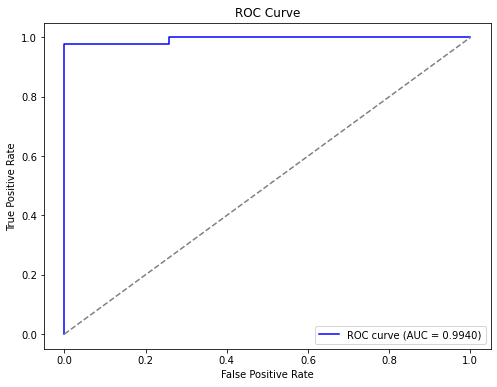

In [33]:
# ROC-AUC (Receiver Operating Characteristic - Area Under Curve)
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Add a constant to the model (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
log_reg_model_stats = sm.Logit(y_train, X_train_with_const).fit()

# Display the regression summary
print(log_reg_model_stats.summary())


In [ ]:
pip install modelsummary

In [34]:

import modelsummary

# Generating the summary table
modelsummary.summary(log_reg_model, output="table")


ModuleNotFoundError: No module named 'modelsummary'